### Final Assignment of Top Mentor 
### Kaggle Data Set of Video Game Sales.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('D:/TopMentor/Final Assignment/Video Games Sales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data Cleaning

In [3]:
New_data = data.drop(['Rank', 'Name', 'Year', 'Publisher'], axis = 'columns')
New_data.head()
New_data.isnull().sum()

Platform        0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [4]:
labelEncoder = LabelEncoder()
New_data['Genre'] = labelEncoder.fit_transform(New_data['Genre'])
New_data['Platform'] = labelEncoder.fit_transform(New_data['Platform'])

In [5]:
New_data['Platform'].head()

0    26
1    11
2    26
3    26
4     5
Name: Platform, dtype: int32

### Now Data Analysis

#### Checking Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre'>

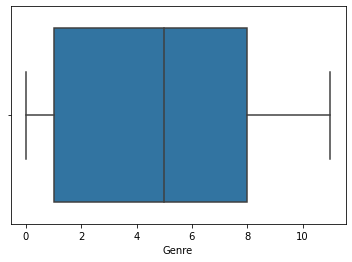

In [6]:
sns.boxplot(New_data['Genre'])

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NA_Sales'>

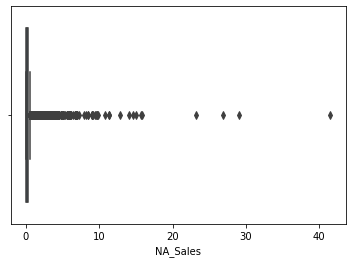

In [7]:
sns.boxplot(New_data['NA_Sales']) # Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EU_Sales'>

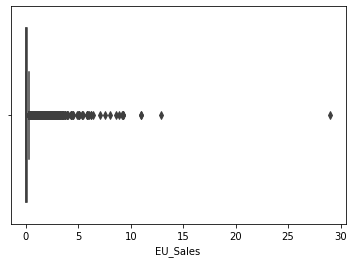

In [8]:
sns.boxplot(New_data['EU_Sales']) # Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JP_Sales'>

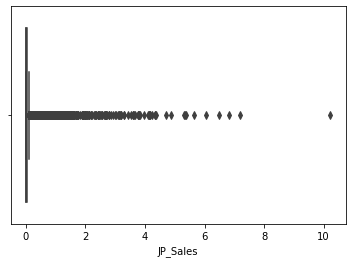

In [9]:
sns.boxplot(New_data['JP_Sales']) # Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Other_Sales'>

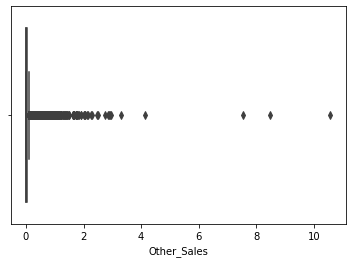

In [10]:
sns.boxplot(New_data['Other_Sales']) # Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Global_Sales'>

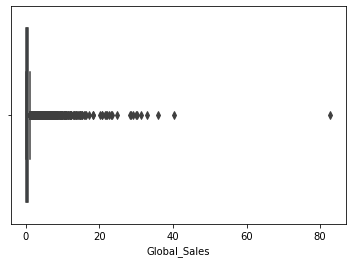

In [11]:
sns.boxplot(New_data['Global_Sales']) # Outlier

### Removing Outlier using IQR

In [12]:
Q1 = New_data.quantile(0.25)
Q1

Platform        7.00
Genre           1.00
NA_Sales        0.00
EU_Sales        0.00
JP_Sales        0.00
Other_Sales     0.00
Global_Sales    0.06
Name: 0.25, dtype: float64

In [13]:
Q3 = New_data.quantile(0.75)

In [14]:
IQR = Q3 - Q1
IQR

Platform        14.00
Genre            7.00
NA_Sales         0.24
EU_Sales         0.11
JP_Sales         0.04
Other_Sales      0.04
Global_Sales     0.41
dtype: float64

In [15]:
data1 = New_data[~((New_data < (Q1 - 1.5*IQR)) | (New_data > (Q3 + 1.5*IQR)))]
data1.shape

(16598, 7)

### Droping NA Or Null Values 

In [16]:
data2 = data1.dropna()
data2.shape

(12018, 7)

In [17]:
data2.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2206,28,0,0.51,0.26,0.09,0.08,0.94
2253,28,2,0.58,0.26,0.00,0.08,0.92
2278,28,11,0.58,0.24,0.01,0.09,0.91
2288,4,8,0.57,0.26,0.00,0.08,0.91
2330,6,4,0.60,0.22,0.05,0.02,0.89


### Training and Testing Data

In [18]:
X = data2.drop(['Genre'], axis = 'columns')

In [19]:
y = data2.Genre

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [21]:
X_train.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9437,17,0.09,0.02,0.00,0.01,0.13
13016,19,0.05,0.00,0.00,0.00,0.05
14745,16,0.00,0.00,0.03,0.00,0.03
7667,16,0.10,0.08,0.00,0.03,0.20
13275,19,0.00,0.00,0.05,0.00,0.05


### Decision Tree

In [43]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
DT.score(X_train, y_train)

0.5601521635758441

### RandomForest "

In [65]:
RFC = RandomForestClassifier(criterion='entropy')
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [66]:
RFC.score(X_train, y_train)

0.5600332857822159

### Naive Bayes (Gaussian NB) 

In [49]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [50]:
NB.score(X_train, y_train)

0.1565620542082739

### SVM

In [53]:
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [54]:
SVM.score(X_train, y_train)

0.2005468378506895

### Linear SVM

In [57]:
LSVM = LinearSVC()
LSVM.fit(X_train, y_train)

C:\Users\prajw\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [58]:
LSVM.score(X_train, y_train)

0.21279125059438897